# **Welcome to the Python Workshop! Here is your starter code**


In [1]:
%matplotlib inline

### Try out hello world below! It's easy I promise.

In [2]:
print("Hello World")

Hello World


## What are we analyzing? 

We're going to be looking at the sales numbers over a 5 year period of batmobiles for Wayne Enterprises. We can see that data below here, press ctrl+enter in the code block to run it!

In [3]:
import pandas as pd

sales = [455, 495, 516, 570, 575]
years = [1,2,3,4,5]

df = pd.DataFrame({'Total Sales($)':sales, 'Year':years})
df

,Total Sales($),Year
0,455,1
1,495,2
2,516,3
3,570,4
4,575,5


## Let's do some simple math! In the blocks below, try your hand at calculating the mean, variance and standard deviation.

Feel free to comment out the code and see how easy it is to work in python.

In [4]:
def calcMean(data):
    totalSum = sum(sales)
    numTotal = len(sales)
    mean = totalSum/numTotal
    return mean

calcMean(sales)

522.2

In [5]:
def calcVariance(data):
    mean = calcMean(data)
    var  = (sum(pow(x-mean,2) for x in sales)) / len(sales) 
    return var

foundVar = calcVariance(sales)
print(foundVar)

2073.36


In [6]:
import math

def calcStd(varianceData):
    std  = math.sqrt(calcVariance(varianceData)) 
    return std

print(calcStd(foundVar))

45.53416299878587


## We can make it easier than that! 

The above was the beauty of python, easy to work with and follow along. But we can make the calculations easier than that!

Enter numpy!

In [7]:
import numpy as np

np.mean(sales)

522.2

In [8]:
np.var(sales)

2073.36

In [9]:
np.std(sales)

45.53416299878587

## What about linear regression?

Refresher: https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

Little bit more dicey right? Yeah it sucks.





## Here's the quick and easy alternative...

In [10]:
linregressModel = np.polyfit(years, sales, 1)
slope = linregressModel[0]
intercept = linregressModel[1]
print("slope: %f    intercept: %f" % (linregressModel[0], linregressModel[1]))

slope: 31.500000    intercept: 427.700000


In [11]:
modelPredictions = np.polyval(linregressModel, years)
absError = modelPredictions - sales

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(sales)) 

print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 9.426558226627588
R-squared: 0.957142030327584


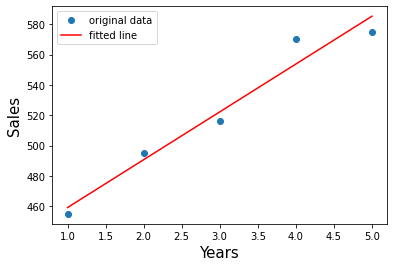

In [12]:
import matplotlib.pyplot as plt

x = np.array(years)
y = np.array(sales)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.legend()
plt.show()

## What if we wanted to predict the sales in the future?

Well that's easy! We can just use the linear regression model we have above to predict for year 6 for example. 

Feel free to change the yearToPredict!

In [13]:
yearToPredict = 6

predict = np.poly1d(linregressModel)
predictedSale = predict(yearToPredict)

x_new = np.array([yearToPredict])
y_new = np.array([predictedSale])

print(predictedSale)

616.6999999999999


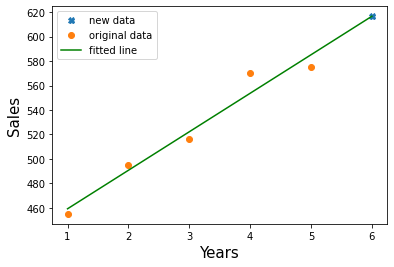

In [14]:
xFull = np.append(x, x_new)

plt.plot(x_new, y_new, 'X', label='new data')
plt.plot(x, y, 'o', label='original data')
plt.plot(xFull, intercept + slope*xFull, 'g', label='fitted line')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.legend()
plt.show()

## What about a real life scenario?

In real life, data is often a lot larger than just 5 sets of data. They could be in excel files, databases or you have to go hunting for them. 

Let's look at the sample dataset below and see what magic we can do with that with everything we learned above!

Begin by reading in the sampleDataset.csv file :)

In [15]:
dfFull = pd.read_csv("sampleDataset.csv") #read in csv file

It's always good practice to explore what kind of data we're working with. Sure you can open the file and explore it for yourself but it is often the case that datasets are huge and impractical to manually inspect. 

Thankfully, we have the pandas library to explore the data for us and give us an idea of what we're working with. 

In [16]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Looks like it's some kind of housing dataset...

## What about common statistics?

Well we can just use the .describe() command and it'll give us this beautiful chart of all the meaningful stats you'd ever need to get into data analysis with just one line of code for the entire dataset!

In [17]:
dfFull.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now let's actually look at the data! .head() gives us the first 5 columns but you can easily view more than that by adding a number in the brackets!

In [18]:
dfFull.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Enter Linear Regression (again)!

Now that we have the data, let's just analyze it like we did earlier with the smaller data! 

Let's apply this to analyze the relationship between price and the sqft_living.

In [19]:
xData = np.array(dfFull['sqft_living'])
yData = np.array(dfFull['price'])

linregressModelFull = np.polyfit(xData, yData, 1)
slope = linregressModelFull[0]
intercept = linregressModelFull[1]
print("slope: %f    intercept: %f" % (linregressModelFull[0], linregressModelFull[1]))

slope: 280.623568    intercept: -43580.743094


In [20]:
modelPredictions = np.polyval(linregressModelFull, xData)
absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData)) 

print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 261440.79030067174
R-squared: 0.4928532179037932


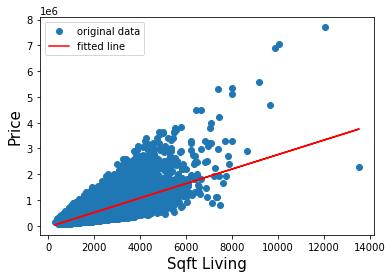

In [21]:
plt.plot(xData, yData, 'o', label='original data')
plt.plot(xData, intercept + slope*xData, 'r', label='fitted line')
plt.xlabel('Sqft Living', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()

In [22]:
sqftToPredict = 20000

predict = np.poly1d(linregressModelFull)
predictedVal = predict(sqftToPredict)

x_new = np.array([sqftToPredict])
y_new = np.array([predictedVal])

print(predictedVal)

5568890.614854492


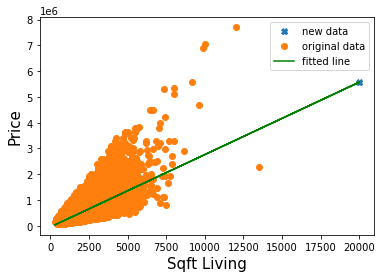

In [23]:
xFull = np.append(xData, x_new)

plt.plot(x_new, y_new, 'X', label='new data')
plt.plot(xData, yData, 'o', label='original data')
plt.plot(xFull, intercept + slope*xFull, 'g', label='fitted line')
plt.xlabel('Sqft Living', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()

## Report Building

Now that you have all this work done, you might want to show it to someone or share it with other people. All you have to do is go to File in the top left corner and click Download as .pdf!